In [62]:
import numpy as np
import math
from math import exp
import matplotlib.pyplot as plt

In [63]:
def cost(x):
    x1 = x[0]
    x2 = x[1]
    return np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)

In [64]:
def gradient(x):
    x1 = x[0]
    x2 = x[1]
    grad1 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) - np.exp(-x1 - 0.1)
    grad2 = 3*np.exp(x1 + 3*x2 - 0.1) - 3*np.exp(x1 - 3*x2 - 0.1)
    return np.array([grad1, grad2])

In [65]:
def Hess(x):    
    x1 = x[0]
    x2 = x[1]    
    h11 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)
    h12 = 3*np.exp(x1 + 3*x2 -0.1) - 3*np.exp(x1 - 3*x2 - 0.1)
    h21 = 3*np.exp(x1 + 3*x2 - 0.1) - 3*np.exp(x1 - 3*x2 -0.1)
    h22 = 9*np.exp(x1 + 3*x2 -0.1) + 9*np.exp(x1 - 3*x2 -0.1)    
    hessienne = np.array([[h11, h21], [h12, h22]])    
    return hessienne

In [66]:
def optimal_step(x0,d):
    num = -gradient(x0).T@d
    denom = (d.T@Hess(x0)@d)
    return num/denom

In [67]:
def backtrack(x,grad,cost,crit,sigma0,c,rho,fig = True):
    #TO DO  
    d = -grad
    i = 0
    sigma = sigma0
    max_iter = 100
    sigma_list = []
    flist = []
    compar = cost(x + sigma * d )
    cost_x = cost(x)
    sigma_list = [sigma]
    flist = [compar]
    
    while compar > cost_x + c * sigma * crit  and i < max_iter:
        sigma = rho * sigma
        compar = cost(x + sigma * d)
        sigma_list.append(sigma)
        flist.append(compar)
        i += 1
    if fig == True:      
        return sigma, sigma_list, flist          
    else :
        return sigma

In [68]:
def steepest_descent(x0,cost,gradient,method):
    #xlist : list of points
    #flist : list of cost functions
    #nlist : list of gradient norms (stop)
    xk = x0
    xlist = [xk]
    flist = [cost(xk)]
    nlist = [np.linalg.norm(gradient(xk))]
    k = 0

    while nlist[-1] > 1e-13 and k < 20:
        d = -gradient(xk)
        crit = d.T@d
        sigma, sigma_list, flist = method(xk,gradient(xk),cost,crit,sigma0,c,rho)
        #sigma = method(xk, gradient(x0))
        xk = xk + sigma*d
        flist.append(cost(xk))
        xlist.append(xk)
        nlist.append(np.linalg.norm(gradient(xk)))
        k += 1  
    return np.array(xlist), np.array(flist), np.array(nlist)

In [69]:
import numpy as argmax

In [1]:
def steepest_descent_L1(x0,cost,gradient,method):
    #xlist : list of points
    #flist : list of cost functions
    #nlist : list of gradient norms (stop)
    xk = x0
    n = len(x0)
    xlist = [xk]
    flist = [cost(xk)]
    nlist = [np.linalg.norm(gradient(xk))]
    k = 0
    
    while nlist[-1] > 1e-13 and k < 20:
        i = np.argmax(gradient(xk))
        d = np.zeros((n))
        d[i]=-np.sign(gradient(xk)[i])
        crit = d.T@d
        sigma, sigma_list, flist = method(xk,gradient(xk),cost,crit,sigma0,c,rho)
        #sigma = method(xk, gradient(x0))
        xk = xk + sigma*d
        flist.append(cost(xk))
        xlist.append(xk)
        nlist.append(np.linalg.norm(gradient(xk)))
        k += 1  
    return np.array(xlist), np.array(flist), np.array(nlist)

In [36]:
def Newton_descent(x0, cost, gradient, hess):
    xk = x0
    xlist = [xk]
    flist = [cost(xk)]
    nlist = [np.linalg.norm(np.array(gradient(xk)))]
    h = hess(xk)
    k = 0
    
    while (nlist[-1] > 1e-13) and (k < 20):
        d = (-np.linalg.inv(hess(xk)).T@(np.array(gradient(xk))))
        xk = xk + d
        flist.append((cost(xk)))
        xlist.append(xk)
        z =(np.array(gradient(xk)))
        nlist.append((np.linalg.norm(z)))
        k += 1
    return np.array(xlist), np.array(flist), np.array(nlist)

In [37]:
def cost_approx(x0,d,epsilon):
    cout_approx = cost(x0) + epsilon*gradient(x0).T@d +0.5*(d.T@Hess(x0)@d)*epsilon**2
    return cout_approx

<ipython-input-56-f972cf961b21>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,2)
<ipython-input-56-f972cf961b21>:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,3)
<ipython-input-56-f972cf961b21>:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

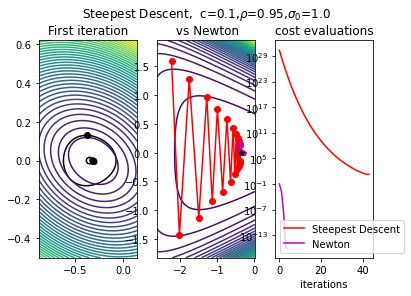

In [56]:
xstar = np.array([-np.log(2)/2, 0])
fmin  = cost(xstar)
# Approximation quadratique 
x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
#
dnewton = -np.linalg.inv(Hess(x0))@gradient(x0)
dnewton = dnewton/np.linalg.norm(dnewton)
sigma_newton  = optimal_step(x0,dnewton)
xnewton = x0 + sigma_newton*dnewton

ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

ax = np.min((x0[0],ax))-.5
bx = np.max((x0[0],bx))+.5
ay = np.min((x0[1],ay))-.5
by = np.max((x0[1],by))+.5


xgrid = np.arange(ax,bx,(bx-ax)/100)
ygrid = np.arange(ay,by,(by-ay)/100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,np.array([cost(xnewton),cost(x0)]),colors='black')


for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        d = np.array([X[i,j],Y[i,j]])-x0
        epsilon =np.linalg.norm(d)
        d = d/epsilon
        Z[i,j] = cost_approx(x0,d,epsilon)
plt.contour(X, Y, Z,41)
plt.plot((x0[0],xnewton[0]),(x0[1],xnewton[1]),'ko')

plt.title('First iteration')

#########################################################################""

# bactrack parameters
sigma0 = 1.
c=.1
rho = 0.95
#grid reboot
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

    
xlist,flist,nlist =  steepest_descent(x0,cost,gradient,backtrack)
xlist = np.asarray(xlist)
plt.subplot(1,3,2)
plt.plot(xlist[:,0], xlist[:,1],'ro-',label='points')
plt.title("Steepest Descent,  c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0)+"\n vs Newton")

###########################################################################

ax = np.min((xlist[:,0,].min(),ax))-.2
bx = np.max((xlist[:,0,].max(),bx))+.2
ay = np.min((xlist[:,1,].min(),ay))-.2
by = np.max((xlist[:,1,].max(),by))+.2

plt.subplot(1,3,3)

plt.semilogy(range(len(flist)), flist-fmin+1e-16,'r-',label='Steepest Descent')
plt.xlabel('iterations')

xlist,flist,nlist = Newton_descent(x0,cost,gradient,Hess)
xlist = np.asarray(xlist)

plt.subplot(1,3,2)
plt.plot(xlist[:,0], xlist[:,1],'mp-',label='Steepest Descent')


ax = np.min((xlist[:,0,].min(),ax))-.2
bx = np.max((xlist[:,0,].max(),bx))+.2
ay = np.min((xlist[:,1,].min(),ay))-.2
by = np.max((xlist[:,1,].max(),by))+.2

plt.subplot(1,3,3)
plt.semilogy(range(len(flist)), flist-fmin+1e-16,'m-',label='Newton')
plt.xlabel('iterations')
plt.legend()
plt.title('cost evaluations')

#    
xgrid = np.arange(ax,bx,(bx-ax)/100)
ygrid = np.arange(ay,by,(by-ay)/100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,2)
plt.contour(X, Y, Z,41)

plt.plot(xstar[0], xstar[1],'k*',label='points')
plt.show()

# L1

<ipython-input-92-b751bd7087ae>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,2)
<ipython-input-92-b751bd7087ae>:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,3)
<ipython-input-92-b751bd7087ae>:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

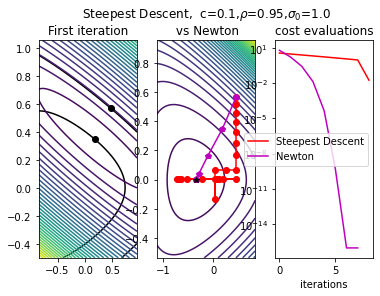

In [92]:
xstar = np.array([-np.log(2)/2, 0])
fmin  = cost(xstar)
# Approximation quadratique 
x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
#
dnewton = -np.linalg.inv(Hess(x0))@gradient(x0)
dnewton = dnewton/np.linalg.norm(dnewton)
sigma_newton  = optimal_step(x0,dnewton)
xnewton = x0 + sigma_newton*dnewton

ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

ax = np.min((x0[0],ax))-.5
bx = np.max((x0[0],bx))+.5
ay = np.min((x0[1],ay))-.5
by = np.max((x0[1],by))+.5


xgrid = np.arange(ax,bx,(bx-ax)/100)
ygrid = np.arange(ay,by,(by-ay)/100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,np.array([cost(xnewton),cost(x0)]),colors='black')


for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        d = np.array([X[i,j],Y[i,j]])-x0
        epsilon =np.linalg.norm(d)
        d = d/epsilon
        Z[i,j] = cost_approx(x0,d,epsilon)
plt.contour(X, Y, Z,41)
plt.plot((x0[0],xnewton[0]),(x0[1],xnewton[1]),'ko')

plt.title('First iteration')

#########################################################################""

# bactrack parameters
sigma0 = 1.
c=.1
rho = 0.95
#grid reboot
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

    
xlist,flist,nlist =  steepest_descent_L1(x0,cost,gradient,backtrack)
xlist = np.asarray(xlist)
plt.subplot(1,3,2)
plt.plot(xlist[:,0], xlist[:,1],'ro-',label='points')
plt.title("Steepest Descent,  c="+str(c)+","r'$\rho$'"="+str(rho)+","r'$\sigma_0$'"="+str(sigma0)+"\n vs Newton")

###########################################################################

ax = np.min((xlist[:,0,].min(),ax))-.2
bx = np.max((xlist[:,0,].max(),bx))+.2
ay = np.min((xlist[:,1,].min(),ay))-.2
by = np.max((xlist[:,1,].max(),by))+.2

plt.subplot(1,3,3)

plt.semilogy(range(len(flist)), flist-fmin+1e-16,'r-',label='Steepest Descent')
plt.xlabel('iterations')

xlist,flist,nlist = Newton_descent(x0,cost,gradient,Hess)
xlist = np.asarray(xlist)

plt.subplot(1,3,2)
plt.plot(xlist[:,0], xlist[:,1],'mp-',label='Steepest Descent')


ax = np.min((xlist[:,0,].min(),ax))-.2
bx = np.max((xlist[:,0,].max(),bx))+.2
ay = np.min((xlist[:,1,].min(),ay))-.2
by = np.max((xlist[:,1,].max(),by))+.2

plt.subplot(1,3,3)
plt.semilogy(range(len(flist)), flist-fmin+1e-16,'m-',label='Newton')
plt.xlabel('iterations')
plt.legend()
plt.title('cost evaluations')

#    
xgrid = np.arange(ax,bx,(bx-ax)/100)
ygrid = np.arange(ay,by,(by-ay)/100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,2)
plt.contour(X, Y, Z,41)

plt.plot(xstar[0], xstar[1],'k*',label='points')
plt.show()